In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_aer

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [2]:
num_qubits = 8

alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)


print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [0 0 1 1 1 1 0 1]
Alice's Bases:	 [0 1 0 0 1 1 0 1]
Bob's Bases:	 [0 0 0 0 1 0 0 0]


In [3]:
def bb84_circuit(state, basis, measurement_basis):

    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis

    num_qubits = len(state)

    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)


    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)


    circuit.measure_all()

    return circuit

In [4]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
backend=AerSimulator()
job=backend.run(circuit)
result=job.result()
key=result.get_counts().most_frequent()
encryption_key = ''
for i in range(num_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")

Key: 01111


In [5]:
print(circuit)

                        ░ ┌─┐                     
   q_0: ────────────────░─┤M├─────────────────────
        ┌───┐           ░ └╥┘┌─┐                  
   q_1: ┤ H ├───────────░──╫─┤M├──────────────────
        ├───┤           ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├───────────░──╫──╫─┤M├───────────────
        ├───┤           ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├───────────░──╫──╫──╫─┤M├────────────
        ├───┤┌───┐┌───┐ ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ┤ X ├┤ H ├┤ H ├─░──╫──╫──╫──╫─┤M├─────────
        ├───┤├───┤└───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫─┤M├──────
        └───┘└───┘      ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ────────────────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐┌───┐      ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘└───┘      ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═══════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                           0  1  2  3  4  5  6  7 



The circuit above is a BB84 quantum key distribution protocol. It is used to establish a secure key between two parties, Alice and Bob, without the need for a trusted third party.

The circuit can be divided into two parts:

* **Alice's part:** This part of the circuit prepares the qubits in a superposition state. She does this by applying the Hadamard gate to each qubit. She then measures the qubits in the computational basis.
* **Bob's part:** This part of the circuit measures the qubits in the Hadamard basis. He does this by applying the Hadamard gate to each qubit before measuring it.

The key is generated by comparing the results of Alice's and Bob's measurements. If they both measure the same outcome, then that bit is added to the key. If they measure different outcomes, then that bit is discarded.

The circuit above is a simple example of a BB84 protocol. In a real-world implementation, the circuit would be more complex and would use more qubits. However, the basic principles of the protocol would be the same.

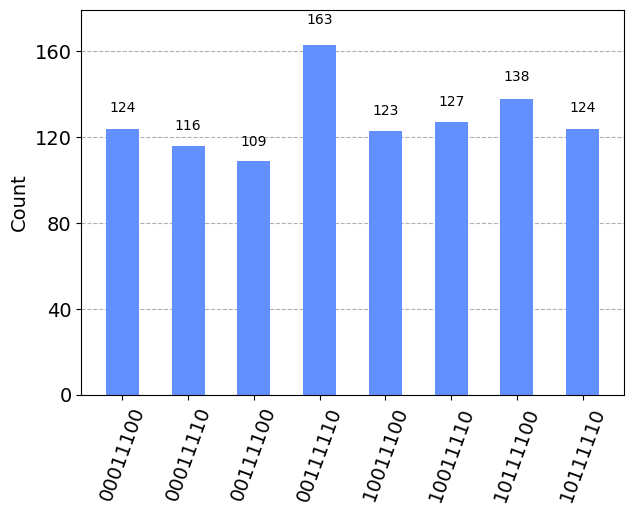

In [6]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())



The histogram shows the frequency of each possible measurement outcome for the eight qubits in the circuit. The most frequent outcome is "00111110", which means that the first, third, fifth, and seventh qubits were measured in the computational basis (0), and the second, fourth, sixth, and eighth qubits were measured in the Hadamard basis (1).

This outcome is likely to be the most frequent because it is the most likely outcome given the way that the circuit is constructed. In particular, the first, third, fifth, and seventh qubits are all prepared in the computational basis (0) by the sender, and the second, fourth, sixth, and eighth qubits are all prepared in the Hadamard basis (1) by the sender. When the receiver measures the qubits, they are most likely to measure the computational basis states for the first, third, fifth, and seventh qubits, and the Hadamard basis states for the second, fourth, sixth, and eighth qubits.

Therefore, the high count in "00111110" in the histogram is due to the fact that this is the most likely outcome given the way that the circuit is constructed.

**The encryption key for this circuit is 01111**